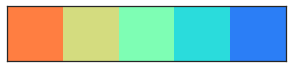

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
import os


sns.set(style = 'white', font_scale=2)

color = sns.color_palette("rainbow_r",5) #PiYG
sns.palplot(color)

In [2]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score, matthews_corrcoef, precision_score, recall_score, f1_score



In [3]:
paths = ['./mapping_Cirrhosis_results',
        './mapping_IBD_results', 
        './mapping_Obesity_results',
        './mapping_T2D_results']

names = ['Cirrhosis', 'IBD', 'Obesity', 'T2D']

alldf = []
for ps, name in zip(paths, names):
    df = pd.read_pickle(os.path.join(ps, 'dfres_10FCV_10times.pkl'))
    df['dataset'] = name
    alldf.append(df)
dfres = pd.concat(alldf).reset_index(drop=True)

In [4]:
def _get_auc(df):
    aucs = []
    for y_true, y_score  in zip(df.y_true, df.y_score):
        auc_value = roc_auc_score(y_true, y_score, average='weighted') # weighted AUC
        aucs.append(auc_value)
    return aucs

In [5]:
order = ['Random', 'MDS', 'UMAP',  't-SNE', 'LLE', 'ISOMAP'] 

#['Random', 'SE', 'MDS', 'UMAP', 't-SNE', 'ISOMAP', 'LLE']

color = sns.color_palette("rainbow_r", len(order)).as_hex() #PiYG

In [34]:
dfp = dfres.groupby(['method', 'repeat_seed', 'dataset', 'fold']).apply(_get_auc).apply(pd.Series).mean(axis=1).reset_index()

In [35]:
dfp.groupby('method')[0].mean().sort_values()

method
Random    0.799686
SE        0.810286
MDS       0.812631
UMAP      0.813948
t-SNE     0.814769
ISOMAP    0.820696
LLE       0.822684
Name: 0, dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Random v.s. MDS: t-test paired samples, P_val=1.402e-01 stat=-1.487e+00
Random v.s. UMAP: t-test paired samples, P_val=4.841e-02 stat=-1.998e+00
Random v.s. t-SNE: t-test paired samples, P_val=3.046e-02 stat=-2.196e+00
Random v.s. LLE: t-test paired samples, P_val=1.146e-02 stat=-2.576e+00
Random v.s. ISOMAP: t-test paired samples, P_val=3.669e-05 stat=-4.323e+00


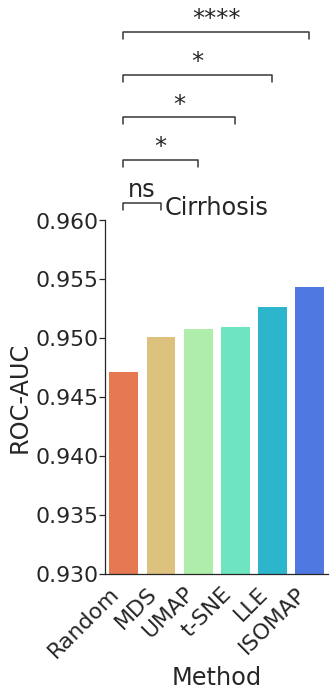

In [46]:
from statannot import add_stat_annotation

dfp1 = dfp[dfp.dataset == 'Cirrhosis']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'method', y = 0, data = dfp1, ci = None,
            order = order, capsize=0.1, #errcolor='.5', errwidth=1.5
            palette=color, ) #color=color, 

ax.set_ylim(0.93, 0.96)
# ax.legend().remove()
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('Method')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
        
add_stat_annotation(x = 'method', y = 0, order = order,
                    data = dfp1, ax=ax,
                    box_pairs=box,
                    test='t-test_paired',  
                    comparisons_correction=None,
                    text_format='star', 
                    loc='outside', verbose=2)
    
plt.xticks(rotation=45, ha = 'right')
ax.set_title('Cirrhosis')

fig.savefig('./results/Cirrhosis.pdf', bbox_inches='tight', dpi=400) 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Random v.s. MDS: t-test paired samples, P_val=2.739e-01 stat=-1.100e+00
Random v.s. UMAP: t-test paired samples, P_val=5.136e-02 stat=-1.972e+00
Random v.s. t-SNE: t-test paired samples, P_val=7.654e-03 stat=-2.723e+00
Random v.s. LLE: t-test paired samples, P_val=4.378e-01 stat=-7.790e-01
Random v.s. ISOMAP: t-test paired samples, P_val=5.904e-06 stat=-4.788e+00


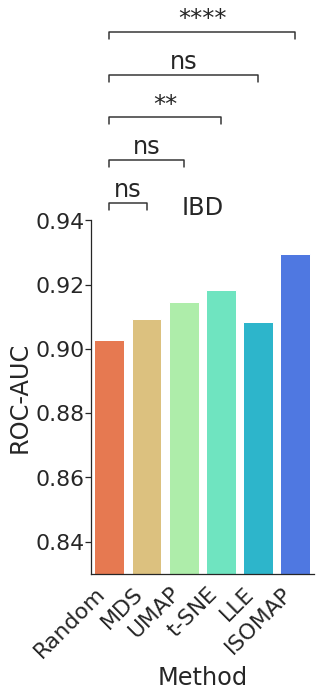

In [48]:
dfp1 = dfp[dfp.dataset == 'IBD']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'method', y = 0, data = dfp1,  ci = None,
            order = order, capsize=0.1, errcolor='.5', 
            palette=color, errwidth=1.5) #color=color, 

ax.set_ylim(0.83, 0.94)
# ax.legend().remove()
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('Method')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
    # for j in range(i):
    #     if i != j:
    #         box.append((order[i], order[j]))
        
add_stat_annotation(x = 'method', y = 0, order = order,
                    data = dfp1, ax=ax,
                    box_pairs=box,
                    test='t-test_paired',  #
                    comparisons_correction=None,
                    text_format='star', 
                    loc='outside', verbose=2)
    
ax.set_title('IBD')
plt.xticks(rotation=45, ha = 'right')
fig.savefig('./results/IBD.pdf', bbox_inches='tight', dpi=400) 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Random v.s. MDS: t-test paired samples, P_val=2.327e-02 stat=-2.305e+00
Random v.s. UMAP: t-test paired samples, P_val=1.398e-02 stat=-2.502e+00
Random v.s. t-SNE: t-test paired samples, P_val=5.237e-02 stat=-1.964e+00
Random v.s. LLE: t-test paired samples, P_val=4.546e-06 stat=-4.853e+00
Random v.s. ISOMAP: t-test paired samples, P_val=4.334e-03 stat=-2.920e+00


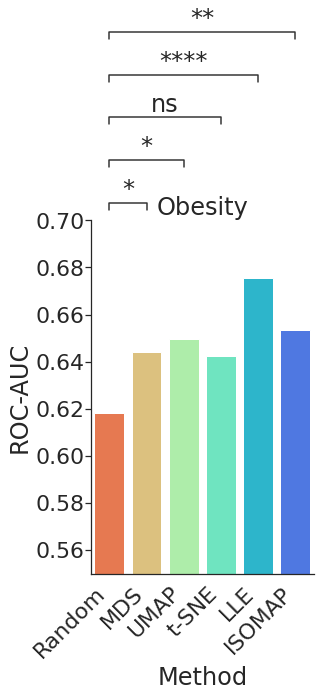

In [49]:
dfp1 = dfp[dfp.dataset == 'Obesity']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'method', y = 0, data = dfp1,  ci = None,
            order = order, capsize=0.1, errcolor='.5', 
            palette=color, errwidth=1.5) #color=color, 

ax.set_ylim(0.55, 0.70)
# ax.legend().remove()
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('Method')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
        
add_stat_annotation(x = 'method', y = 0, order = order,
                    data = dfp1, ax=ax,
                    box_pairs=box,
                    test='t-test_paired',  #
                    comparisons_correction=None,
                    text_format='star', 
                    loc='outside', verbose=2)
    
ax.set_title('Obesity')

plt.xticks(rotation=45, ha = 'right')
fig.savefig('./results/Obesity.pdf', bbox_inches='tight', dpi=400) 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Random v.s. MDS: t-test paired samples, P_val=1.355e-02 stat=-2.514e+00
Random v.s. UMAP: t-test paired samples, P_val=1.371e-01 stat=-1.499e+00
Random v.s. t-SNE: t-test paired samples, P_val=9.008e-03 stat=-2.664e+00
Random v.s. LLE: t-test paired samples, P_val=1.012e-05 stat=-4.654e+00
Random v.s. ISOMAP: t-test paired samples, P_val=1.161e-02 stat=-2.571e+00


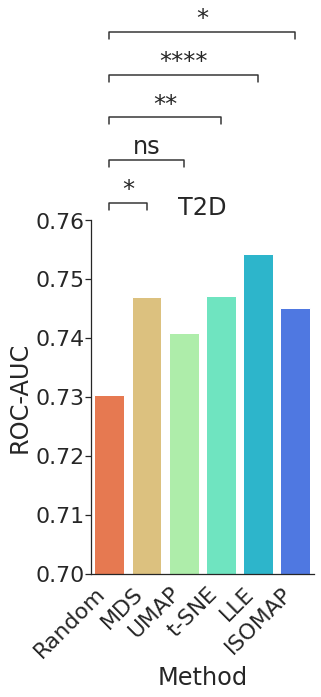

In [50]:
dfp1 = dfp[dfp.dataset == 'T2D']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'method', y = 0, data = dfp1,  ci = None,
            order = order, capsize=0.1, errcolor='.5', 
            palette=color, errwidth=1.5) #color=color, 

ax.set_ylim(0.7, 0.76)
# ax.legend().remove()
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('Method')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)

box = []
for i in range(len(order)):
    if i == 0:
        continue
    box.append((order[0], order[i]))
        
add_stat_annotation(x = 'method', y = 0, order = order,
                    data = dfp1, ax=ax,
                    box_pairs=box,
                    test='t-test_paired',  #
                    comparisons_correction=None,
                    text_format='star', 
                    loc='outside', verbose=2)
    
plt.xticks(rotation=45, ha = 'right')

ax.set_title('T2D')

fig.savefig('./results/T2D.pdf', bbox_inches='tight', dpi=400) 